In [1]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from skopt import gp_minimize
from skopt.utils import use_named_args
from sklearn.svm import SVR
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_colwidth', -1)

/home/arthur/miniconda3/envs/mlp/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/arthur/miniconda3/envs/mlp/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/arthur/miniconda3/envs/mlp/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/arthur/miniconda3/envs/mlp/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/arthur/miniconda3/envs/mlp/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be import

# Load and prepare data

In [2]:
def normalise(X, mu=None, sigma=None):
    if mu is None:
        mu = X.mean()
    if sigma is None:
        sigma = X.std()
    return (X - mu) / sigma, mu, sigma

In [3]:
X = pd.read_csv('X.csv')
X = X[X.columns[2:]] # get rid of irrelevant features
X = X.drop('Female', axis=1)
y = pd.read_csv('y.csv')
y = y['Median Income']
non_nan_ind = y[~y.isna()].index
X = X.iloc[non_nan_ind]
y = y.iloc[non_nan_ind]

In [4]:
X_tr, X_test, y_tr_og, y_test_og = train_test_split(X, y, test_size=.1, random_state=3742)

y_test = y_test_og
y_tr = y_tr_og

# norm (for non-tree approach)
# X_tr, muX, sigmaX = normalise(X_tr)
# X_test, _, _ = normalise(X_test, muX, sigmaX)
# y_tr, muY, sigmaY = normalise(y_tr_og)
# y_test, _, _ = normalise(y_test_og, muY, sigmaY)

# Find optimal hyperparams

In [5]:
opt = BayesSearchCV(xgb.XGBRegressor(learning_rate=.1), {
#     'subsample': Real(.1, 1),
#     'colsample_bytree': Real(.1, 1),
#     'gamma': Real(0, 1),
    'min_child_weight': Integer(1, 10),
    'max_depth': Integer(4, 8),
    }, verbose=2, cv=3, n_points=4, n_jobs=4, scoring='neg_mean_squared_error')
opt.fit(X_tr, y_tr)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] max_depth=7, min_child_weight=4 .................................
[CV] max_depth=7, min_child_weight=4 .................................
[CV] max_depth=7, min_child_weight=4 .................................
[CV] max_depth=6, min_child_weight=1 .................................
[CV] .................. max_depth=6, min_child_weight=1, total=   3.1s
[CV] max_depth=6, min_child_weight=1 .................................
[CV] .................. max_depth=7, min_child_weight=4, total=   3.6s
[CV] max_depth=6, min_child_weight=1 .................................
[CV] .................. max_depth=7, min_child_weight=4, total=   3.6s
[CV] max_depth=5, min_child_weight=8 .................................
[CV] .................. max_depth=7, min_child_weight=4, total=   3.8s
[CV] max_depth=5, min_child_weight=8 .................................
[CV] .................. max_depth=5, min_child_weight=8, total=   2.4s
[CV] max_depth=5,

[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:    9.5s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:    9.5s finished


[CV] max_depth=5, min_child_weight=2 .................................
[CV] max_depth=5, min_child_weight=2 .................................
[CV] max_depth=5, min_child_weight=2 .................................
[CV] max_depth=6, min_child_weight=8 .................................
[CV] .................. max_depth=5, min_child_weight=2, total=   2.5s
[CV] max_depth=6, min_child_weight=8 .................................
[CV] .................. max_depth=5, min_child_weight=2, total=   2.8s
[CV] max_depth=6, min_child_weight=8 .................................
[CV] .................. max_depth=5, min_child_weight=2, total=   2.8s
[CV] max_depth=8, min_child_weight=6 .................................
[CV] .................. max_depth=6, min_child_weight=8, total=   3.3s
[CV] max_depth=8, min_child_weight=6 .................................
[CV] .................. max_depth=6, min_child_weight=8, total=   3.0s
[CV] max_depth=8, min_child_weight=6 .................................
[CV] .

[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:   10.8s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:   10.8s finished


Fitting 3 folds for each of 4 candidates, totalling 12 fits


/home/arthur/miniconda3/envs/mlp/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[CV] max_depth=7, min_child_weight=5 .................................
[CV] max_depth=7, min_child_weight=5 .................................
[CV] max_depth=7, min_child_weight=5 .................................
[CV] max_depth=4, min_child_weight=7 .................................
[CV] .................. max_depth=4, min_child_weight=7, total=   2.0s
[CV] max_depth=4, min_child_weight=7 .................................
[CV] .................. max_depth=7, min_child_weight=5, total=   3.6s
[CV] max_depth=4, min_child_weight=7 .................................
[CV] .................. max_depth=7, min_child_weight=5, total=   3.6s
[CV] max_depth=6, min_child_weight=3 .................................
[CV] .................. max_depth=7, min_child_weight=5, total=   3.7s
[CV] max_depth=6, min_child_weight=3 .................................
[CV] .................. max_depth=4, min_child_weight=7, total=   1.9s
[CV] max_depth=6, min_child_weight=3 .................................
[CV] .

[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:    9.7s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:    9.7s finished
/home/arthur/miniconda3/envs/mlp/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/arthur/miniconda3/envs/mlp/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 4 candidates, totalling 12 fits


/home/arthur/miniconda3/envs/mlp/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[CV] max_depth=6, min_child_weight=4 .................................
[CV] max_depth=6, min_child_weight=4 .................................
[CV] max_depth=6, min_child_weight=4 .................................
[CV] max_depth=6, min_child_weight=4 .................................
[CV] .................. max_depth=6, min_child_weight=4, total=   3.0s
[CV] max_depth=6, min_child_weight=4 .................................
[CV] .................. max_depth=6, min_child_weight=4, total=   3.0s
[CV] max_depth=6, min_child_weight=4 .................................
[CV] .................. max_depth=6, min_child_weight=4, total=   3.1s
[CV] max_depth=6, min_child_weight=4 .................................
[CV] .................. max_depth=6, min_child_weight=4, total=   3.2s
[CV] max_depth=6, min_child_weight=4 .................................
[CV] .................. max_depth=6, min_child_weight=4, total=   2.9s
[CV] max_depth=6, min_child_weight=4 .................................
[CV] .

[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:    9.4s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:    9.4s finished
/home/arthur/miniconda3/envs/mlp/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/arthur/miniconda3/envs/mlp/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 4 candidates, totalling 12 fits


/home/arthur/miniconda3/envs/mlp/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


[CV] max_depth=8, min_child_weight=5 .................................
[CV] max_depth=8, min_child_weight=5 .................................
[CV] max_depth=8, min_child_weight=5 .................................
[CV] max_depth=6, min_child_weight=4 .................................
[CV] .................. max_depth=6, min_child_weight=4, total=   3.2s
[CV] max_depth=6, min_child_weight=4 .................................
[CV] .................. max_depth=8, min_child_weight=5, total=   4.3s
[CV] max_depth=6, min_child_weight=4 .................................
[CV] .................. max_depth=8, min_child_weight=5, total=   4.3s
[CV] max_depth=6, min_child_weight=4 .................................
[CV] .................. max_depth=8, min_child_weight=5, total=   4.7s
[CV] max_depth=6, min_child_weight=4 .................................
[CV] .................. max_depth=6, min_child_weight=4, total=   3.3s
[CV] max_depth=6, min_child_weight=4 .................................
[CV] .

[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:   10.6s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:   10.6s finished
/home/arthur/miniconda3/envs/mlp/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/arthur/miniconda3/envs/mlp/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/arthur/miniconda3/envs/mlp/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/arthur/miniconda3/envs/mlp/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been ev

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] max_depth=6, min_child_weight=3 .................................
[CV] max_depth=6, min_child_weight=3 .................................
[CV] max_depth=6, min_child_weight=3 .................................
[CV] max_depth=6, min_child_weight=4 .................................
[CV] .................. max_depth=6, min_child_weight=3, total=   3.3s
[CV] max_depth=6, min_child_weight=4 .................................
[CV] .................. max_depth=6, min_child_weight=4, total=   3.3s
[CV] max_depth=6, min_child_weight=4 .................................
[CV] .................. max_depth=6, min_child_weight=3, total=   3.4s
[CV] max_depth=6, min_child_weight=4 .................................
[CV] .................. max_depth=6, min_child_weight=3, total=   3.5s
[CV] max_depth=6, min_child_weight=4 .................................
[CV] .................. max_depth=6, min_child_weight=4, total=   3.0s
[CV] max_depth=6,

[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:    9.5s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:    9.5s finished
/home/arthur/miniconda3/envs/mlp/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/arthur/miniconda3/envs/mlp/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/arthur/miniconda3/envs/mlp/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/arthur/miniconda3/envs/mlp/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been ev

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] max_depth=6, min_child_weight=4 .................................
[CV] max_depth=6, min_child_weight=4 .................................
[CV] max_depth=6, min_child_weight=4 .................................
[CV] max_depth=6, min_child_weight=4 .................................
[CV] .................. max_depth=6, min_child_weight=4, total=   3.0s
[CV] max_depth=6, min_child_weight=4 .................................
[CV] .................. max_depth=6, min_child_weight=4, total=   3.1s
[CV] max_depth=6, min_child_weight=4 .................................
[CV] .................. max_depth=6, min_child_weight=4, total=   3.1s
[CV] max_depth=6, min_child_weight=4 .................................
[CV] .................. max_depth=6, min_child_weight=4, total=   3.2s
[CV] max_depth=6, min_child_weight=4 .................................
[CV] .................. max_depth=6, min_child_weight=4, total=   2.9s
[CV] ............

[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:    9.2s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:    9.2s finished
/home/arthur/miniconda3/envs/mlp/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/arthur/miniconda3/envs/mlp/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/arthur/miniconda3/envs/mlp/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/arthur/miniconda3/envs/mlp/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been ev

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] max_depth=6, min_child_weight=4 .................................
[CV] max_depth=6, min_child_weight=4 .................................
[CV] max_depth=6, min_child_weight=4 .................................
[CV] max_depth=6, min_child_weight=4 .................................
[CV] .................. max_depth=6, min_child_weight=4, total=   3.2s
[CV] max_depth=6, min_child_weight=4 .................................
[CV] .................. max_depth=6, min_child_weight=4, total=   3.4s
[CV] max_depth=6, min_child_weight=4 .................................
[CV] .................. max_depth=6, min_child_weight=4, total=   3.5s
[CV] max_depth=6, min_child_weight=4 .................................
[CV] .................. max_depth=6, min_child_weight=4, total=   3.8s
[CV] max_depth=6, min_child_weight=4 .................................
[CV] .................. max_depth=6, min_child_weight=4, total=   3.1s
[CV] max_depth=6,

[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:    9.8s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:    9.8s finished
/home/arthur/miniconda3/envs/mlp/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/arthur/miniconda3/envs/mlp/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/arthur/miniconda3/envs/mlp/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/arthur/miniconda3/envs/mlp/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been ev

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] max_depth=6, min_child_weight=4 .................................
[CV] max_depth=6, min_child_weight=4 .................................
[CV] max_depth=6, min_child_weight=4 .................................
[CV] max_depth=6, min_child_weight=4 .................................
[CV] .................. max_depth=6, min_child_weight=4, total=   3.3s
[CV] max_depth=6, min_child_weight=4 .................................
[CV] .................. max_depth=6, min_child_weight=4, total=   3.3s
[CV] max_depth=6, min_child_weight=4 .................................
[CV] .................. max_depth=6, min_child_weight=4, total=   3.4s
[CV] max_depth=6, min_child_weight=4 .................................
[CV] .................. max_depth=6, min_child_weight=4, total=   3.4s
[CV] max_depth=6, min_child_weight=4 .................................
[CV] .................. max_depth=6, min_child_weight=4, total=   2.9s
[CV] max_depth=6,

[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:    9.8s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:    9.8s finished
/home/arthur/miniconda3/envs/mlp/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/arthur/miniconda3/envs/mlp/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/arthur/miniconda3/envs/mlp/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/arthur/miniconda3/envs/mlp/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been ev

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] max_depth=6, min_child_weight=4 .................................
[CV] max_depth=6, min_child_weight=4 .................................
[CV] max_depth=6, min_child_weight=4 .................................
[CV] max_depth=6, min_child_weight=4 .................................
[CV] .................. max_depth=6, min_child_weight=4, total=   3.3s
[CV] max_depth=6, min_child_weight=4 .................................
[CV] .................. max_depth=6, min_child_weight=4, total=   3.3s
[CV] max_depth=6, min_child_weight=4 .................................
[CV] .................. max_depth=6, min_child_weight=4, total=   3.3s
[CV] max_depth=6, min_child_weight=4 .................................
[CV] .................. max_depth=6, min_child_weight=4, total=   3.4s
[CV] max_depth=6, min_child_weight=4 .................................
[CV] .................. max_depth=6, min_child_weight=4, total=   3.2s
[CV] max_depth=6,

[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:    9.7s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:    9.7s finished
/home/arthur/miniconda3/envs/mlp/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/arthur/miniconda3/envs/mlp/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/arthur/miniconda3/envs/mlp/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/arthur/miniconda3/envs/mlp/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been ev

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] max_depth=6, min_child_weight=4 .................................
[CV] max_depth=6, min_child_weight=4 .................................
[CV] max_depth=6, min_child_weight=4 .................................
[CV] max_depth=6, min_child_weight=4 .................................
[CV] .................. max_depth=6, min_child_weight=4, total=   3.1s
[CV] max_depth=6, min_child_weight=4 .................................
[CV] .................. max_depth=6, min_child_weight=4, total=   3.1s
[CV] max_depth=6, min_child_weight=4 .................................
[CV] .................. max_depth=6, min_child_weight=4, total=   3.1s
[CV] max_depth=6, min_child_weight=4 .................................
[CV] .................. max_depth=6, min_child_weight=4, total=   3.2s
[CV] max_depth=6, min_child_weight=4 .................................
[CV] .................. max_depth=6, min_child_weight=4, total=   2.9s
[CV] max_depth=6,

[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:    9.2s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:    9.2s finished
/home/arthur/miniconda3/envs/mlp/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/arthur/miniconda3/envs/mlp/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/arthur/miniconda3/envs/mlp/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/arthur/miniconda3/envs/mlp/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been ev

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] max_depth=6, min_child_weight=4 .................................
[CV] max_depth=6, min_child_weight=4 .................................
[CV] max_depth=6, min_child_weight=4 .................................
[CV] max_depth=6, min_child_weight=4 .................................
[CV] .................. max_depth=6, min_child_weight=4, total=   3.0s
[CV] max_depth=6, min_child_weight=4 .................................
[CV] .................. max_depth=6, min_child_weight=4, total=   3.0s
[CV] max_depth=6, min_child_weight=4 .................................
[CV] .................. max_depth=6, min_child_weight=4, total=   3.1s
[CV] max_depth=6, min_child_weight=4 .................................
[CV] .................. max_depth=6, min_child_weight=4, total=   3.2s
[CV] max_depth=6, min_child_weight=4 .................................
[CV] .................. max_depth=6, min_child_weight=4, total=   3.0s
[CV] max_depth=6,

[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:    9.5s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:    9.5s finished
/home/arthur/miniconda3/envs/mlp/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/arthur/miniconda3/envs/mlp/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] max_depth=6, min_child_weight=4 .................................
[CV] max_depth=6, min_child_weight=4 .................................
[CV] max_depth=6, min_child_weight=4 .................................
[CV] max_depth=6, min_child_weight=4 .................................
[CV] .................. max_depth=6, min_child_weight=4, total=   3.2s
[CV] max_depth=6, min_child_weight=4 .................................
[CV] .................. max_depth=6, min_child_weight=4, total=   3.1s
[CV] max_depth=6, min_child_weight=4 .................................
[CV] .................. max_depth=6, min_child_weight=4, total=   3.2s
[CV] .................. max_depth=6, min_child_weight=4, total=   3.3s


[Parallel(n_jobs=4)]: Done   3 out of   6 | elapsed:    3.2s remaining:    3.2s


[CV] .................. max_depth=6, min_child_weight=4, total=   2.8s
[CV] .................. max_depth=6, min_child_weight=4, total=   2.9s


[Parallel(n_jobs=4)]: Done   6 out of   6 | elapsed:    6.1s finished


BayesSearchCV(cv=3, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_iter=50, n_jobs=4, n_points=4,
       optimizer_kwargs=None, pre_dispatch='2*n_jobs', random_state=None,
       refit=True, return_train_score=False,
       scoring='neg_mean_squared_error',
       search_spaces={'min_child_weight': Integer(low=1, high=10), 'max_depth': Integer(low=4, high=8)},
       verbose=2)

In [13]:
best_params = opt.best_params_

In [14]:
opt.best_score_

-394941560.4841304

# Fit model with best params

In [15]:
model = xgb.XGBRegressor(**best_params)

In [16]:
# model = xgb.XGBRegressor(max_depth=6, learning_rate=.1)

In [17]:
model.fit(X_tr, y_tr)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=3, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [21]:
test_err = mean_squared_error(model.predict(X_test), y_test)**.5
train_err = mean_squared_error(model.predict(X_tr), y_tr)**.5
print(f'Train error: {train_err:.2f}\nTest error: {test_err:.2f}')

# recreate = model.predict(X_test) * y_tr_og.std() + y_tr_og.mean()
# std_err = mean_squared_error(recreate, y_test_og)**.5
# print(f'Standard test error: ${std_err:.0f}')

Train error: 14372.27
Test error: 19030.85


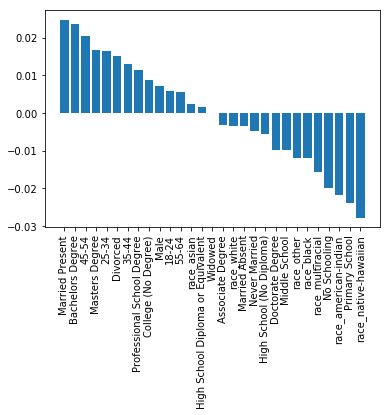

In [22]:
fi = model.feature_importances_
order = np.argsort(fi)[::-1]
plt.bar(range(len(fi)), fi[order] - fi.mean())
plt.xticks(range(len(fi)), list(X.columns[order]), rotation=90)
plt.show()